In [61]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [62]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Import data
df = data.DataReader(['PLANB.BK', 'KKP.BK', 'TU.BK', 'BDMS.BK','COM7.BK'], 'yahoo', start='2021/06/22', end='2022/06/22')
df.head()

Attributes Adj Close                                                Close  \
Symbols     PLANB.BK     KKP.BK      TU.BK    BDMS.BK    COM7.BK PLANB.BK   
Date                                                                        
2021-06-22      6.60  53.841129  17.916706  22.556503  33.343430     6.60   
2021-06-23      6.55  53.601837  17.916706  22.360357  33.581600     6.55   
2021-06-24      6.35  52.883953  18.297915  22.654575  32.867096     6.35   
2021-06-25      6.15  52.883953  18.393215  23.243006  33.105263     6.15   
2021-06-28      6.15  52.883953  18.774424  22.654575  32.867096     6.15   

Attributes                                       ...     Open         \
Symbols    KKP.BK      TU.BK    BDMS.BK COM7.BK  ... PLANB.BK KKP.BK   
Date                                             ...                   
2021-06-22  56.25  18.799999  23.000000   35.00  ...     6.75  56.75   
2021-06-23  56.00  18.799999  22.799999   35.25  ...     6.65  56.25   
2021-06-24  55.25  19.200001  23.100000   34.50  ...     6.50  56.00   
2021-06-25  55.25  19.299999  23.700001   34.75  ...     6.40  55.50   
2021-06-28  55.25  19.700001  23.100000   34.50  ...     6.00  55.25   

Attributes                                    Volume                         \
Symbols         TU.BK    BDMS.BK COM7.BK    PLANB.BK     KKP.BK       TU.BK   
Date                                                                          
2021-06-22  18.500000  22.700001  34.750  15287200.0  2120200.0  42265000.0   
2021-06-23  18.799999  23.000000  35.500  15501300.0  3684700.0  25742700.0   
2021-06-24  18.799999  22.700001  35.375  17893300.0  4817800.0  37248800.0   
2021-06-25  19.299999  23.200001  34.500  19916400.0  2231400.0  24142000.0   
2021-06-28  19.299999  23.600000  34.500  16950700.0  1312200.0  39668700.0   

Attributes                           
Symbols         BDMS.BK     COM7.BK  
Date                                 
2021-06-22   20587300.0  19201600.0  
2021-06-23   23346500.0  15405000.0  
2021-06-24   38184800.0  23001200.0  
2021-06-25   86536700.0   9945400.0  
2021-06-28  111962600.0   8130800.0  

[5 rows x 30 columns]

In [64]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,PLANB.BK,KKP.BK,TU.BK,BDMS.BK,COM7.BK
Date,,,,,
2021-06-22,6.60,53.841129,17.916706,22.556503,33.343430
2021-06-23,6.55,53.601837,17.916706,22.360357,33.581600
2021-06-24,6.35,52.883953,18.297915,22.654575,32.867096
2021-06-25,6.15,52.883953,18.393215,23.243006,33.105263
2021-06-28,6.15,52.883953,18.774424,22.654575,32.867096


In [65]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,PLANB.BK,KKP.BK,TU.BK,BDMS.BK,COM7.BK
Symbols,,,,,
PLANB.BK,4.685996e-04,0.000048,0.000008,-9.339816e-07,0.000083
KKP.BK,4.847315e-05,0.000205,0.000036,2.962172e-05,0.000055
TU.BK,7.505769e-06,0.000036,0.000230,1.645611e-05,0.000022
BDMS.BK,-9.339816e-07,0.000030,0.000016,1.707729e-04,0.000038
COM7.BK,8.267748e-05,0.000055,0.000022,3.836422e-05,0.000352


In [66]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,PLANB.BK,KKP.BK,TU.BK,BDMS.BK,COM7.BK
Symbols,,,,,
PLANB.BK,1.000000,0.156479,0.022844,-0.003302,0.203649
KKP.BK,0.156479,1.000000,0.165237,0.158401,0.204153
TU.BK,0.022844,0.165237,1.000000,0.082965,0.076856
BDMS.BK,-0.003302,0.158401,0.082965,1.000000,0.156535
COM7.BK,0.203649,0.204153,0.076856,0.156535,1.000000


In [67]:
# Randomly weighted portfolio's variance
w = {'PLANB.BK': 0.2, 'KKP.BK': 0.2, 'TU.BK': 0.2, 'BDMS.BK': 0.2,'COM7.BK':0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var.round(4)

0.0001

In [68]:
# Monthly returns for individual companies
ind_er = df.resample('M').last().pct_change().mean()
ind_er

Symbols
PLANB.BK    0.012580
KKP.BK      0.017084
TU.BK      -0.004499
BDMS.BK     0.007689
COM7.BK    -0.001870
dtype: float64

In [69]:
# Portfolio returns
w = [0.2, 0.2, 0.2, 0.2, 0.2]
port_er = (w*ind_er).sum()
port_er.round(4)

0.0062

In [70]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
PLANB.BK    0.342272
KKP.BK      0.226263
TU.BK       0.239989
BDMS.BK     0.206623
COM7.BK     0.296534
dtype: float64

In [71]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
PLANB.BK,0.012580,0.342272
KKP.BK,0.017084,0.226263
TU.BK,-0.004499,0.239989
BDMS.BK,0.007689,0.206623
COM7.BK,-0.001870,0.296534


In [72]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

In [73]:
num_assets = len(df.columns)
num_portfolios = 10000

In [74]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [75]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [76]:
for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [77]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,PLANB.BK weight,KKP.BK weight,TU.BK weight,BDMS.BK weight,COM7.BK weight
0,0.004468,0.146727,0.071474,0.173649,0.193505,0.263894,0.297478
1,0.006531,0.162252,0.092752,0.330143,0.114193,0.115506,0.347407
2,0.003899,0.143573,0.204088,0.041305,0.358598,0.311679,0.084330
3,0.001864,0.152665,0.087794,0.135245,0.464579,0.117493,0.194889
4,0.006678,0.154457,0.240480,0.281773,0.322838,0.060814,0.094095


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

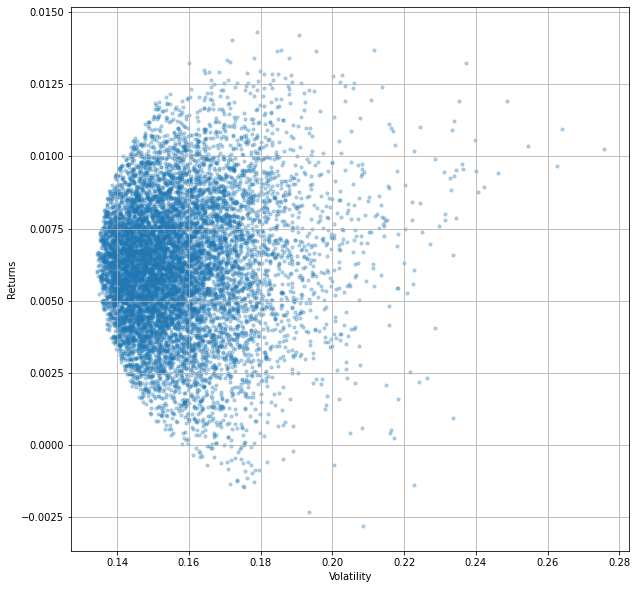

In [78]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [79]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns            0.006615
Volatility         0.134304
PLANB.BK weight    0.116375
KKP.BK weight      0.214723
TU.BK weight       0.230499
BDMS.BK weight     0.349369
COM7.BK weight     0.089034
Name: 5183, dtype: float64

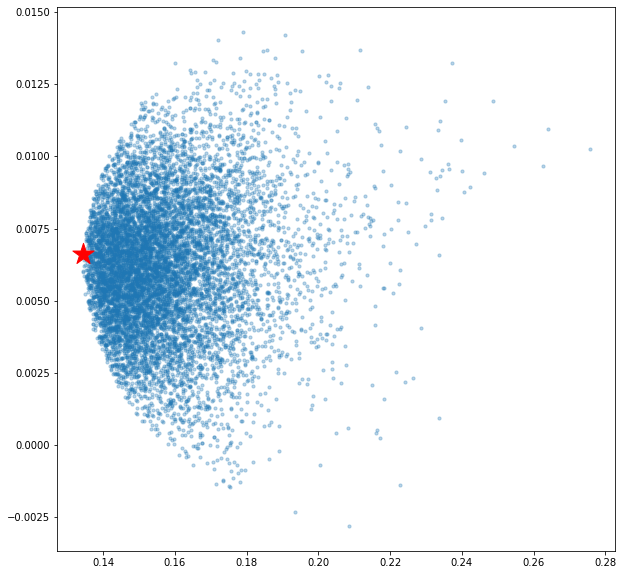

In [80]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)


In [81]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns            0.014321
Volatility         0.179090
PLANB.BK weight    0.246788
KKP.BK weight      0.610087
TU.BK weight       0.013019
BDMS.BK weight     0.114622
COM7.BK weight     0.015484
Name: 1580, dtype: float64

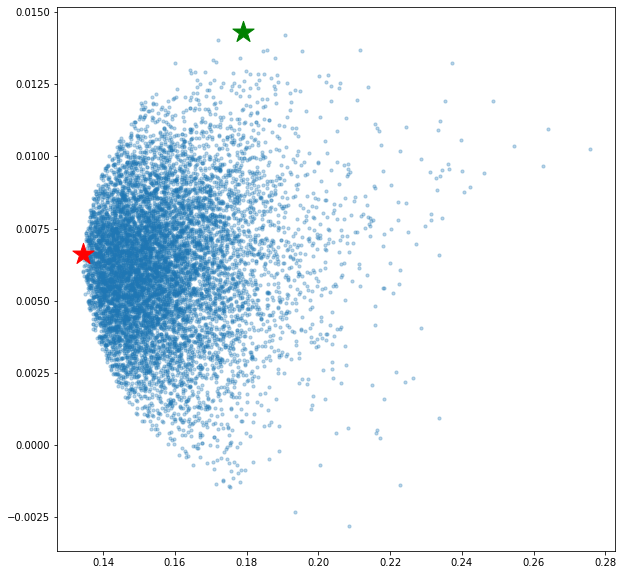

In [82]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)